## This notebook generates a **Chord Diagram** from two csv files with specific formats

data_chromosome_general.csv
``` 
    chr,start,end
    chr1,1,249250621
```
data_links.csv
```
    chr1,start1,end1,chr2,start2,end2
    chr20,37720821,47419255,chr5,162124929,168434522
```

--------------------------
## Notes:
This code uses a default colormap. 

[Original Tutorial](https://github.com/ponnhide/pyCircos/blob/master/tutorial/tutorial.ipynb)



In [76]:
import pycircos

def get_network_data(filename,make_small=1):
    ''' Open the filename and create a list of network data.
        filename: The name of the file to open
        make_small: integer for debug
    '''
    with open(filename) as f:
        l = []
        f.readline()
        for line in f:
            line   = line.rstrip().split(",") 
            name   = line[0]
            length = int(int(line[-1])/make_small)
            l.append((name,length))
        return l

def get_link_data(filename):
    ''' Open the filename and create a list of link data.'''
    arc_length = 1000 # this extends the arcs to the outer circle
    # arc_length = 630 # this will reach part way
    with open(filename) as f:
        l = []
        f.readline()
        for line in f:
            line  = line.rstrip().split(",")
            name1  = line[0]     
            start1 = int(line[1])-1
            end1   = int(line[2])
            name2  = line[3]     
            start2 = int(line[4])-1
            end2   = int(line[5])
            source = (name1, start1, end1, arc_length)
            destination = (name2, start2, end2, arc_length)
            l.append((source,destination,name1))
        return l

def get_circle(data):
    ''' return circle figure '''
    circ = pycircos.Gcircle() 
    for name,length in data:
        arcc = pycircos.Garc(arc_id=name, size=length, interspace=2, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circ.add_garc(arcc) 
    return circ

def plot_links(circle,links):
    ''' draw the links on the circle'''
    for source, destination, name1 in links:
        circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor)
    return circle

def Create_Chord_Diagram( nodes_file, links_file):
    ''' create a chord diagram using files'''
    network_data = get_network_data( nodes_file )
    link_data = get_link_data( links_file )

    circ = get_circle(network_data)
    circ.set_garcs(0,360) # this displays the circle
    # circle2.figure
    cir_lines = plot_links(circ,link_data)  

### The next cell generates the Chord Diagram.

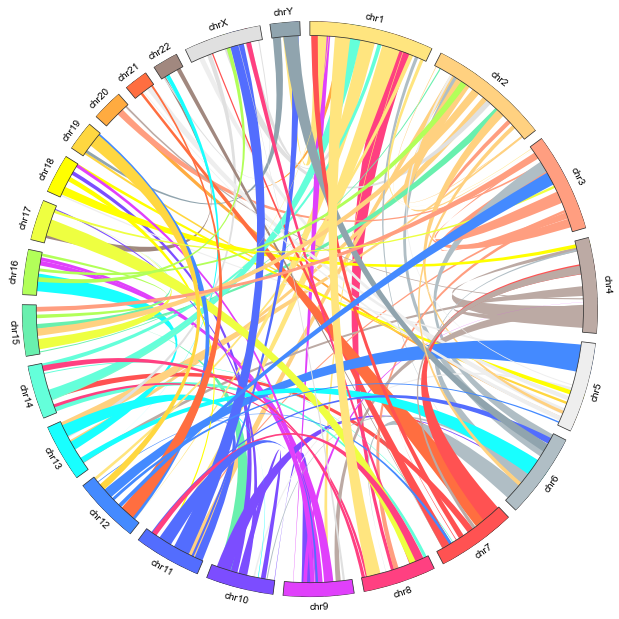

In [77]:
nodefile = 'data_chromosome_general.csv'
linkfile = 'data_links.csv'
Create_Chord_Diagram( nodefile, linkfile ) 